In [1]:
!pip install datasets pillow tqdm

## Download dataset

In [2]:
from datasets import load_dataset

dataset = load_dataset("Codatta/MM-Food-100K")

/Users/josemanuelgarciaportillo/.pyenv/versions/dine/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## EDA

In [3]:
## Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

In [4]:
train_dataset = dataset["train"]
df = train_dataset.to_pandas()

In [5]:
df

,image_url,camera_or_phone_prob,food_prob,dish_name,food_type,ingredients,portion_size,nutritional_profile,cooking_method,sub_dt
0,https://file.b18a.io/7843322356500104680_44354...,0.7,0.95,Fried Chicken,Restaurant food,"[""chicken"",""breading"",""oil""]","[""chicken:300g""]","{""fat_g"":25.0,""protein_g"":30.0,""calories_kcal""...",Frying,20250704
1,https://file.b18a.io/7833227147700100732_67487...,0.7,1.00,Pho,Restaurant food,"[""noodles"",""beef"",""basil"",""lime"",""green onions...","[""noodles:200g"",""beef:100g"",""vegetables:50g""]","{""fat_g"":15.0,""protein_g"":25.0,""calories_kcal""...",boiled,20250702
2,https://file.b18a.io/7832600581600103585_26423...,0.8,0.95,Pan-fried Dumplings,Restaurant food,"[""dumplings"",""chili oil"",""soy sauce""]","[""dumplings:300g"",""sauce:50g""]","{""fat_g"":15.0,""protein_g"":20.0,""calories_kcal""...",Pan-frying,20250625
3,https://file.b18a.io/7839056601700101188_98515...,0.7,1.00,Bananas,Raw vegetables and fruits,"[""Bananas""]","[""Bananas: 10 pieces (about 1kg)""]","{""fat_g"":3.0,""protein_g"":12.0,""calories_kcal"":...",Raw,20250718
4,https://file.b18a.io/7837642737500100261_17312...,0.8,0.90,Noodle Stir-Fry,Restaurant food,"[""noodles"",""chicken"",""vegetables"",""sauce""]","[""noodles:300g"",""chicken:100g"",""vegetables:50g""]","{""fat_g"":20.0,""protein_g"":25.0,""calories_kcal""...",stir-fried,20250711
...,...,...,...,...,...,...,...,...,...,...
99995,https://file.b18a.io/7833255010300109931_28888...,0.8,1.00,Spicy Crawfish,Restaurant food,"[""crawfish"",""green peppers"",""onions"",""spices""]","[""crawfish:500g"",""vegetables:100g""]","{""fat_g"":20.0,""protein_g"":40.0,""calories_kcal""...",boiled and seasoned,20250717
99996,https://file.b18a.io/7837300073200100128_71314...,0.7,0.90,Fried Chicken Wings,Homemade food,"[""chicken wings"",""breading"",""oil""]","[""chicken wings:300g""]","{""fat_g"":25.0,""protein_g"":20.0,""calories_kcal""...",Fried,20250716
99997,https://file.b18a.io/7832710876500109045_73393...,0.7,1.00,Grilled Steak with Fries and Vegetables,Restaurant food,"[""steak"",""fries"",""broccoli"",""carrots"",""bell pe...","[""steak:250g"",""fries:150g"",""vegetables:100g""]","{""fat_g"":45.0,""protein_g"":60.0,""calories_kcal""...",Grilling,20250714
99998,https://file.b18a.io/7839064030900102356_78268...,0.8,0.90,Fried Tofu,Homemade food,"[""tofu"",""oil""]","[""tofu:300g""]","{""fat_g"":12.0,""protein_g"":20.0,""calories_kcal""...",Frying,20250626


In [6]:
def show_images_for_dish(df, dish_name, n=50):
    subset = df[df["dish_name"] == dish_name].sample(n)
    fig, axes = plt.subplots(5, 10, figsize=(20, 10))
    axes = axes.flatten()

    for ax, (_, row) in zip(axes, subset.iterrows()):
        try:
            response = requests.get(row["image_url"], timeout=10)
            img = Image.open(BytesIO(response.content))
            ax.imshow(img)
        except:
            pass
        ax.axis("off")

    plt.suptitle(dish_name)
    plt.tight_layout()
    plt.show()


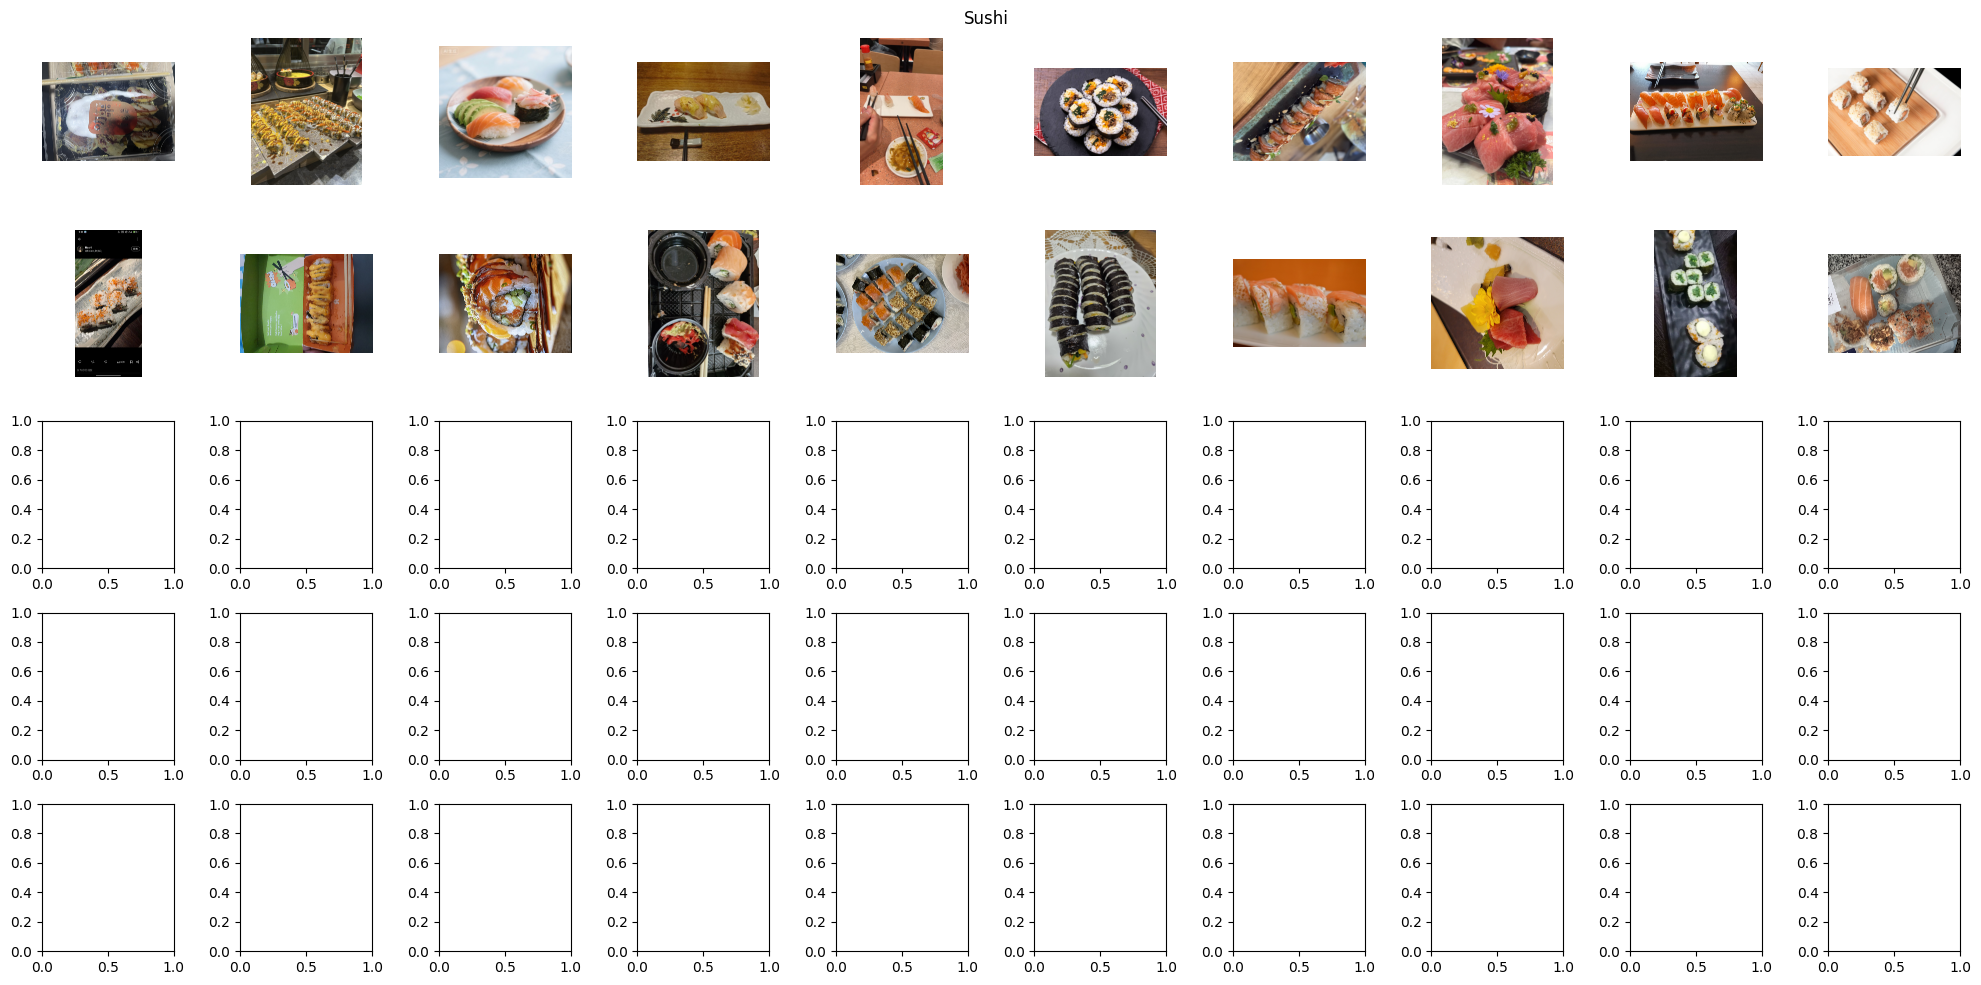

In [7]:
show_images_for_dish(df, "Sushi", 20)

## Downloading images locally 

In [8]:
sushi_row = df[df["dish_name"] == "Sushi"].iloc[0]
ramen_row = df[df["dish_name"] == "Ramen"].iloc[0]

sushi_url = sushi_row["image_url"]
ramen_url = ramen_row["image_url"]

print(sushi_url)
print(ramen_url)

https://file.b18a.io/7833086561400102896_681824_.jpeg
https://file.b18a.io/7832983546200100722_882152_.webp


In [13]:
import requests
from PIL import Image
from io import BytesIO
import os

def download_image(url, save_path):
    response = requests.get(url, timeout=15)
    response.raise_for_status()
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img.save(save_path)

# Save Sushi
download_image(
    sushi_url,
    "../data/mmfood100k/v1/images/sushi/000001.jpg"
)

# Save Ramen
download_image(
    ramen_url,
    "../data/mmfood100k/v1/images/ramen/000001.jpg"
)

print("Images saved locally ✅")

Images saved locally ✅
